In [17]:
import pandas as pd
df = pd.read_json("004_results.jsonl", lines=True)

labels = [
'happiness', 
'neutral', 
'sadness',
'fear', 
'anger', 
]
from sklearn.metrics import accuracy_score, f1_score
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"],
                                                     row["y_pred"],
                                                     ), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"],
                                              row["y_pred"], average="macro", labels=labels), axis=1)
df.tail(9)[["model_name_or_path", "eval_file", "accuracy", "macroF1"]]

,model_name_or_path,eval_file,accuracy,macroF1
40,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_dev.csv,0.732673,0.716091
41,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_test.csv,0.653465,0.616470
42,classla/wav2vec2-large-slavic-parlaspeech-hr,001_dev.csv,0.712871,0.691617
43,classla/wav2vec2-large-slavic-parlaspeech-hr,001_dev.csv,0.712871,0.691617
44,classla/wav2vec2-large-slavic-parlaspeech-hr,001_test.csv,0.673267,0.658715
45,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_dev.csv,0.668317,0.641811
46,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_dev.csv,0.668317,0.641811
47,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_test.csv,0.683168,0.652945
48,facebook/wav2vec2-large-slavic-voxpopuli-v2,001_test.csv,0.683168,0.652945


In [18]:
df.accuracy.value_counts()


0.732673    28
0.653465    14
0.712871     2
0.668317     2
0.683168     2
0.673267     1
Name: accuracy, dtype: int64

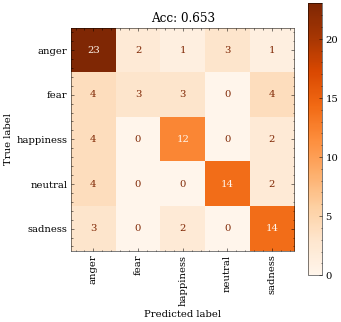

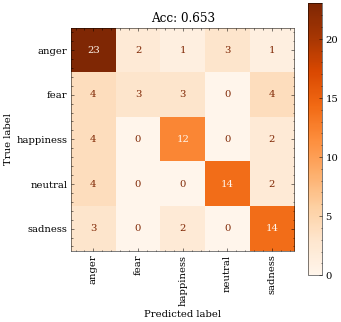

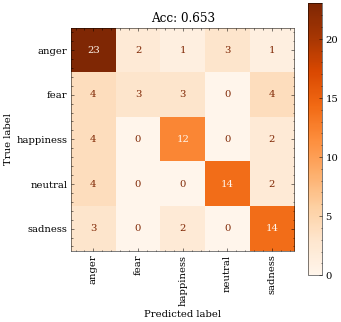

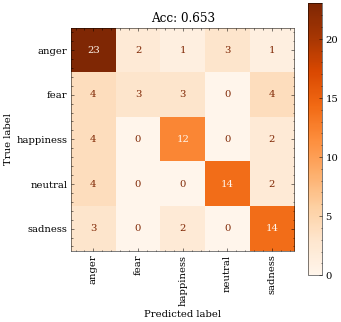

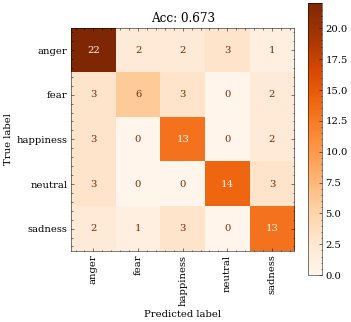

In [22]:
def plotCM(y_true, y_pred):
    import matplotlib.pyplot as plt
    plt.style.use("science no-latex".split())
    from sklearn.metrics import ConfusionMatrixDisplay
    fig, ax = plt.subplots(figsize=(5,5))
    ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=90)
    acc = accuracy_score(y_true, y_pred)
    ax.set_title(f"Acc: {acc:0.3}")
    plt.show()
subset = df[df.model_name_or_path.str.contains("classla") & df.eval_file.str.contains("test")]
for i, row in subset.iterrows():
    plotCM(row["y_true"], row["y_pred"])

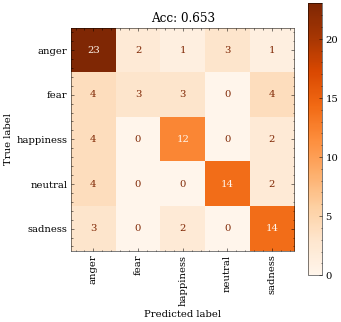

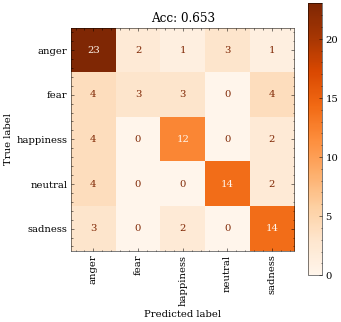

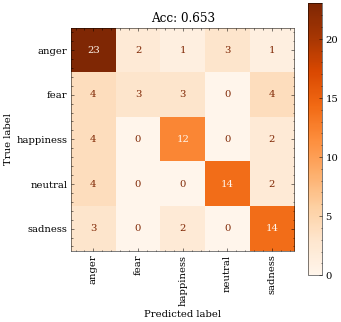

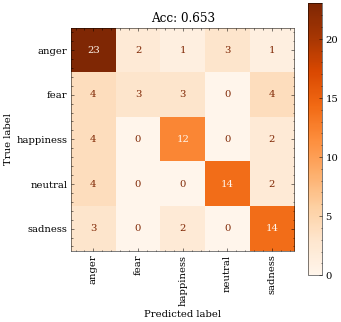

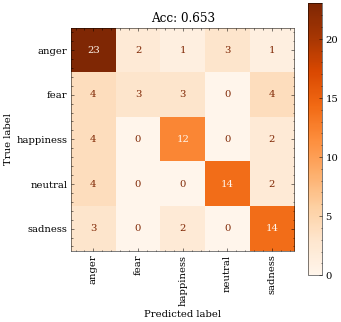

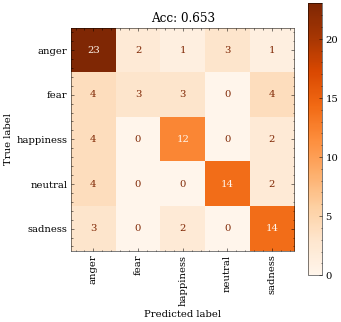

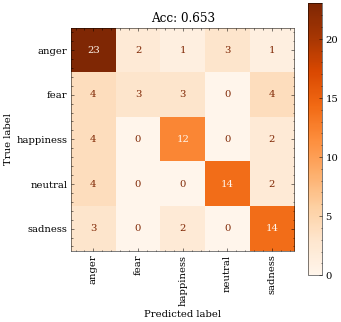

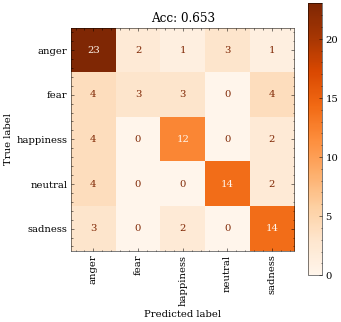

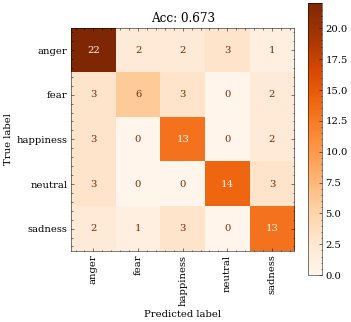

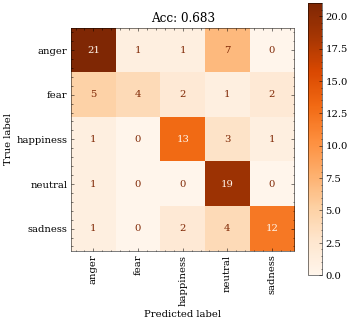

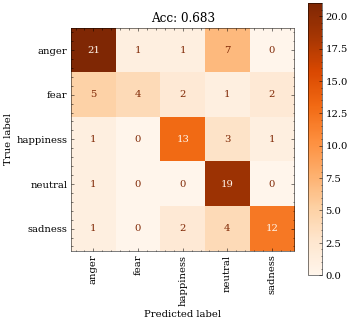

In [23]:
subset = df[df.model_name_or_path.str.contains("slavic") & df.eval_file.str.contains("test")]
for i, row in subset.iterrows():
    plotCM(row["y_true"], row["y_pred"])

In [26]:
df.groupby("model_name_or_path eval_file".split())[["accuracy", "macroF1"]].mean()

accuracy   macroF1
model_name_or_path                           eval_file                       
classla/wav2vec2-large-slavic-parlaspeech-hr 001_dev.csv   0.728713  0.711196
                                             001_test.csv  0.657426  0.624919
facebook/wav2vec2-large-960h-lv60-self       001_dev.csv   0.732673  0.716091
                                             001_test.csv  0.653465  0.616470
facebook/wav2vec2-large-slavic-voxpopuli-v2  001_dev.csv   0.719802  0.701235
                                             001_test.csv  0.663366  0.628628